<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Suzuki\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

<AxesSubplot:ylabel='Density'>

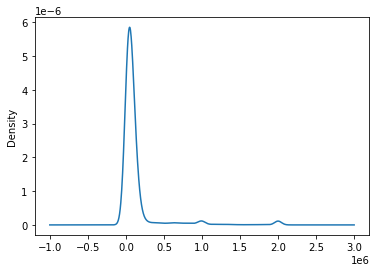

In [4]:
# your code goes here

df["ConvertedComp"].plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

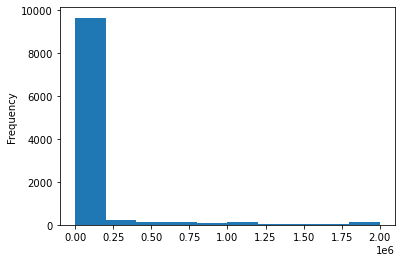

In [5]:
# your code goes here

df["ConvertedComp"].plot(kind='hist')

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here

df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here

df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here

df.groupby("Gender")["ConvertedComp"].median()

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here

min_age = df["Age"].min()
q1_age = df["Age"].quantile(0.25)
median_age = df["Age"].median()
q3_age = df["Age"].quantile(0.75)
max_age = df["Age"].max()

print('Min = {} \nQ1 = {} \nMedian = {} \nQ3 = {} \nMax = {}'.format(min_age, q1_age, median_age, q3_age, max_age))

Min = 16.0 
Q1 = 25.0 
Median = 29.0 
Q3 = 35.0 
Max = 99.0


Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

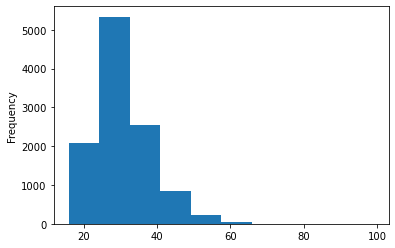

In [10]:
# your code goes here

df["Age"].plot(kind='hist')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


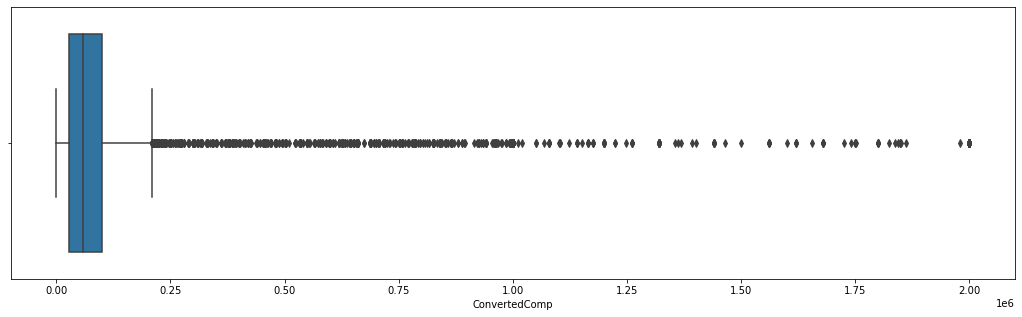

In [11]:
# your code goes here

plt.figure(figsize=(18,5))
sns.boxplot(x = df["ConvertedComp"], data = df)
plt.show()

Question 3 - Based on the boxplot of ‘Age’ how many outliers do you see below Q1?

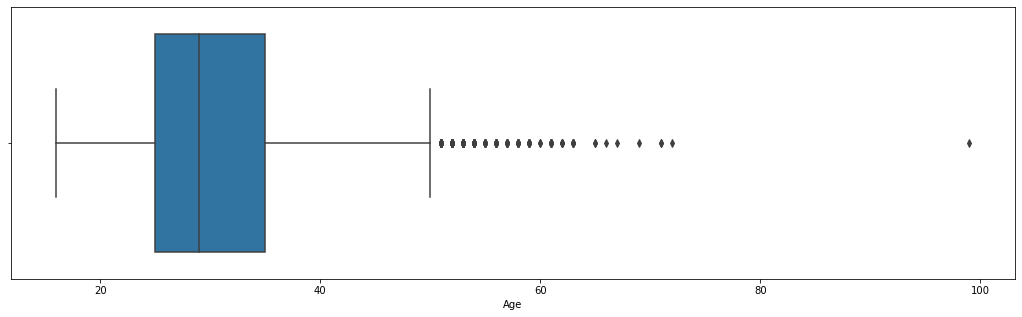

In [12]:
# Create the age boxplot

plt.figure(figsize=(18,5))
sns.boxplot(x = df["Age"], data = df)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here

df.ConvertedComp.quantile([0.25,0.5,0.75])

0.25     26868.0
0.50     57745.0
0.75    100000.0
Name: ConvertedComp, dtype: float64

In [14]:
qrt3 = df.ConvertedComp.quantile(0.75)
qrt1 = df.ConvertedComp.quantile(0.25)

In [15]:
iqr = qrt3 - qrt1

In [16]:
print("The interquartile range is", iqr)

The interquartile range is 73132.0


Find out the upper and lower bounds.


In [17]:
# your code goes here

lower_b = qrt1 - 1.5 * iqr
upper_b = qrt3 + 1.5 * iqr

print("The lower bound is {} and the upper bound is {}".format(lower_b, upper_b))

The lower bound is -82830.0 and the upper bound is 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [18]:
# your code goes here

lower_OL = (df["ConvertedComp"] < lower_b).sum()
upper_OL = (df["ConvertedComp"] > upper_b).sum()
total_OL = lower_OL + upper_OL
print("There are {} lower outliers and {} upper outliers, the total is {} outliers!".format(lower_OL, upper_OL, total_OL))

There are 0 lower outliers and 879 upper outliers, the total is 879 outliers!


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
# your code goes here

df = df[(df["ConvertedComp"] <= upper_b)]

In [20]:
(df["ConvertedComp"] > upper_b).sum()

0

In [21]:
# Median after removing outliers

df["ConvertedComp"].median()

52704.0

In [22]:
# Mean after removing outliers

df["ConvertedComp"].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
# your code goes here

df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
